In [1]:
#Cossio Vidaurre Jose Alejandro

In [2]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Lectura del Dataset
dataset = pd.read_csv('Dummy_Data_HSS.csv')
dataset.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
5,29.0,9.614382,1.027163,Mega,105.889148
6,55.0,24.893811,4.273602,Micro,198.679825
7,31.0,17.355042,2.289855,Nano,108.733932
8,76.0,24.648898,7.130116,Macro,270.189400
9,13.0,0.431128,2.229423,Mega,48.280582


In [4]:
#Informacion del dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [5]:
#Contando los datos nulos
dataset.isnull().sum(axis = 0)

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [6]:
#Al ver que hay datos nulos y no son muchos, una opcion es eliminarlos
dataset.dropna(inplace = True)

In [7]:
#Comprobando los datos nulos
dataset.isnull().sum(axis = 0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [8]:
#Creacion de variables
#Nota: En el google colab hay un metodo "dataset.corr()" que muestra la correlacion entre cada columna
#Entonces la columna 0 y la ultima columna son las que tienen mas correlacion entre las demas columnas
#Por ello se elegio esas columnas como X y "y"
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, -1].values

In [9]:
X

array([16., 13., 41., ..., 44., 71., 42.])

In [10]:
y

array([ 54.73275715,  46.67789698, 150.1778288 , ..., 163.6314574 ,
       253.6104113 , 148.2024141 ])

In [11]:
#Conversion a numpy array
X = np.array(X)
print(X)
print('==========')
y = np.array(y)
print(y)

[16. 13. 41. ... 44. 71. 42.]
[ 54.73275715  46.67789698 150.1778288  ... 163.6314574  253.6104113
 148.2024141 ]


In [12]:
#Reshape de las variables
X = X.reshape(-1,1)
print(X)
print('==========')
y = y.reshape(-1,1)
print(y)

[[16.]
 [13.]
 [41.]
 ...
 [44.]
 [71.]
 [42.]]
[[ 54.73275715]
 [ 46.67789698]
 [150.1778288 ]
 ...
 [163.6314574 ]
 [253.6104113 ]
 [148.2024141 ]]


In [13]:
#Entrenamiento del modelo
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [14]:
#Prediccion de un nuevo resultado
regressor.predict([[55.5]])

array([195.87089457])

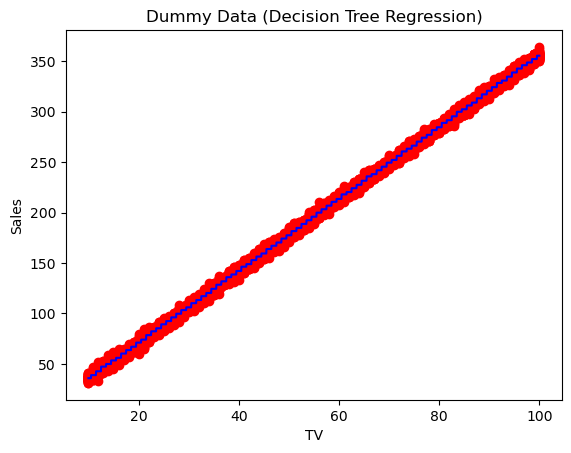

In [15]:
#Visualizacion de los Arboles de decision
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Dummy Data (Decision Tree Regression)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()